In [4]:
"""
This is a Machine Learning (ML) project for predicting Heat Transfer Coefficient \
(a very important parameter that measures how efficient heat is being removed from \
a flowing liquid through small diameter tube) at high saturation temperatures  
"""

__author__ = "Ernest"
__email__ = "yawgyan496@gmail.com"
__status__ = "Completed"
__Data__ = "19.08.24"

In [101]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer

### Exploratory Data Analysis (EDA)

In [6]:
file = "DataSet_High_SatTemp_.xlsx"
data=pd.read_excel(file)


In [7]:
df=data.rename(columns={"Author": "Authors", 
                        "Fluid ":"Working Fluid", 
                        "Geometry":"Tube Geometry",
                        "ID (mm)":"Internal Diameter [${mm}$]",
                        "Tsat [oC]": "Saturation Temperature [${^{o}C}$]", 
                        "Psat [kPa]": "Saturation Pressure [${kPa}$]",
                        "G [kg/m2s]":"G $[{kg/m^{2}s}]$",
                        "q [W/m2]":'q" $[{kW/m^{2}}]$', 
                        "x [-]":"x [-]",
                        "HTC [W/m2 K]": "HTC $[{W/m^{2}K}]$",
                        "T_reduced [-]": "T$_{Red}[-]$", 
                        "P_reduced [-]": "P$_{Red} [-]$",
                        "ρL (kg/m3) ": "ρ $$_{L} [kg/m^3]$$",
                        'ρV [kg/m3]': "ρ$_{_V} [kg/m^3]$", 
                        'uL (Pa-s)':'uL (Pa-s)',
                        'uV (Pa-s)':'uV (Pa-s)',
                        'λL (W/m-K)':'λL (W/m-K)',
                        'λV (W/m-K)':'λV (W/m-K)',
                        'σ(Nm−1)':'σ(Nm−1)',
                        'hL ([kJ/kg)':'hL ([kJ/kg)',
                        'hV ([kJ/kg)':'hV ([kJ/kg)',
                        'hLV ([kJ/kg)':'hLV ([kJ/kg)', 
                        'cpL (J/kgK)':'cpL (J/kgK)',
                        'cpV (kJ/kgK)':'cpV (kJ/kgK)',
                        'Tcrit [ ◦C]':'Tcrit [ ◦C]',
                        'Pcrit [kPa]':'Pcrit [kPa]', 
                        'L (mm)':'L $[mm]$'}
              )


In [8]:
df=df[(df['x [-]']>0) & (df['x [-]']<1)]


In [134]:
print(len(df.columns))

27


In [9]:
df.head(5)

,Authors,Working Fluid,Geometry,Internal Diameter [${mm}$],Saturation Temperature [${^{o}C}$],Saturation Pressure [${kPa}$],G $[{kg/m^{2}s}]$,"q"" $[{kW/m^{2}}]$",x [-],HTC $[{W/m^{2}K}]$,...,﻿λV (W/m-K),﻿σ(﻿Nm−1),hL (﻿[kJ/kg),hV (﻿[kJ/kg),hLV (﻿[kJ/kg),﻿cpL (﻿J/kgK),﻿cpV (﻿kJ/kgK),﻿Tcrit [ ◦C],﻿Pcrit [kPa],L $[mm]$
3,Charnay et al. (2015),R245fa,H,3.0,60.0,462.46,300,50000,0.040712,7208.588957,...,0.015769,0.009242,279.99,449.11,169.12,1413.7,1029.0,153.86,3651.0,185
4,Charnay et al. (2015),R245fa,H,3.0,60.0,462.46,300,50000,0.063613,7259.713701,...,0.015769,0.009242,279.99,449.11,169.12,1413.7,1029.0,153.86,3651.0,185
5,Charnay et al. (2015),R245fa,H,3.0,60.0,462.46,300,50000,0.091603,7464.212679,...,0.015769,0.009242,279.99,449.11,169.12,1413.7,1029.0,153.86,3651.0,185
6,Charnay et al. (2015),R245fa,H,3.0,60.0,462.46,300,50000,0.117048,7464.212679,...,0.015769,0.009242,279.99,449.11,169.12,1413.7,1029.0,153.86,3651.0,185
7,Charnay et al. (2015),R245fa,H,3.0,60.0,462.46,300,50000,0.142494,7464.212679,...,0.015769,0.009242,279.99,449.11,169.12,1413.7,1029.0,153.86,3651.0,185


In [10]:
df.tail(5)

,Authors,Working Fluid,Geometry,Internal Diameter [${mm}$],Saturation Temperature [${^{o}C}$],Saturation Pressure [${kPa}$],G $[{kg/m^{2}s}]$,"q"" $[{kW/m^{2}}]$",x [-],HTC $[{W/m^{2}K}]$,...,﻿λV (W/m-K),﻿σ(﻿Nm−1),hL (﻿[kJ/kg),hV (﻿[kJ/kg),hLV (﻿[kJ/kg),﻿cpL (﻿J/kgK),﻿cpV (﻿kJ/kgK),﻿Tcrit [ ◦C],﻿Pcrit [kPa],L $[mm]$
1573,Ernest et al. (2024),R1234ZE(E),H,2.07,60.0,1276.6,400,50000,0.784997,11274.155389,...,0.017273,0.00447,284.78,420.26,135.48,1558.3,1203.6,109.4,3634.9,125
1574,Ernest et al. (2024),R1234ZE(E),H,2.07,60.0,1276.6,400,50000,0.784992,11227.950222,...,0.017273,0.00447,284.78,420.26,135.48,1558.3,1203.6,109.4,3634.9,125
1575,Ernest et al. (2024),R1234ZE(E),H,2.07,60.0,1276.6,400,50000,0.797842,10767.223431,...,0.017273,0.00447,284.78,420.26,135.48,1558.3,1203.6,109.4,3634.9,125
1576,Ernest et al. (2024),R1234ZE(E),H,2.07,60.0,1276.6,400,50000,0.797826,10628.607930,...,0.017273,0.00447,284.78,420.26,135.48,1558.3,1203.6,109.4,3634.9,125
1577,Ernest et al. (2024),R1234ZE(E),H,2.07,60.0,1276.6,400,50000,0.801046,10582.733983,...,0.017273,0.00447,284.78,420.26,135.48,1558.3,1203.6,109.4,3634.9,125


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1567 entries, 3 to 1577
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Authors                             1567 non-null   object 
 1   Working Fluid                       1567 non-null   object 
 2   Geometry                            1567 non-null   object 
 3   Internal Diameter [${mm}$]          1567 non-null   float64
 4   Saturation Temperature [${^{o}C}$]  1567 non-null   float64
 5   Saturation Pressure [${kPa}$]       1567 non-null   float64
 6   G $[{kg/m^{2}s}]$                   1567 non-null   int64  
 7   q" $[{kW/m^{2}}]$                   1567 non-null   int64  
 8   x [-]                               1567 non-null   float64
 9   HTC $[{W/m^{2}K}]$                  1567 non-null   float64
 10  T$_{Red}[-]$                        1567 non-null   float64
 11  P$_{Red} [-]$                       1567 non-nul

In [12]:
df.describe ().T

,count,mean,std,min,25%,50%,75%,max
Internal Diameter [${mm}$],1567.0,9.196828,8.536302,2.000000,2.070000,3.000000,21.000000,21.000000
Saturation Temperature [${^{o}C}$],1567.0,96.732636,24.246443,55.000000,80.000000,100.000000,115.070000,144.850000
Saturation Pressure [${kPa}$],1567.0,1336.897620,582.334296,400.010000,789.010000,1276.600000,1743.700000,2739.500000
G $[{kg/m^{2}s}]$,1567.0,418.373325,279.478323,83.000000,188.000000,400.000000,600.000000,1500.000000
"q"" $[{kW/m^{2}}]$",1567.0,30245.692406,14024.550824,6000.000000,20000.000000,29000.000000,30000.000000,90000.000000
x [-],1567.0,0.376844,0.261810,0.001371,0.154634,0.325440,0.567593,0.999840
HTC $[{W/m^{2}K}]$,1567.0,7064.760049,4520.340322,438.356164,3207.201434,5993.804140,10094.488745,27325.736714
T$_{Red}[-]$,1567.0,0.635748,0.136800,0.357468,0.519953,0.649942,0.747433,0.869970
P$_{Red} [-]$,1567.0,0.366967,0.160392,0.109562,0.216108,0.351206,0.477595,0.753666
﻿ρL (kg/m3),1567.0,1070.253644,105.520208,826.880000,998.600000,1089.500000,1152.500000,1252.400000


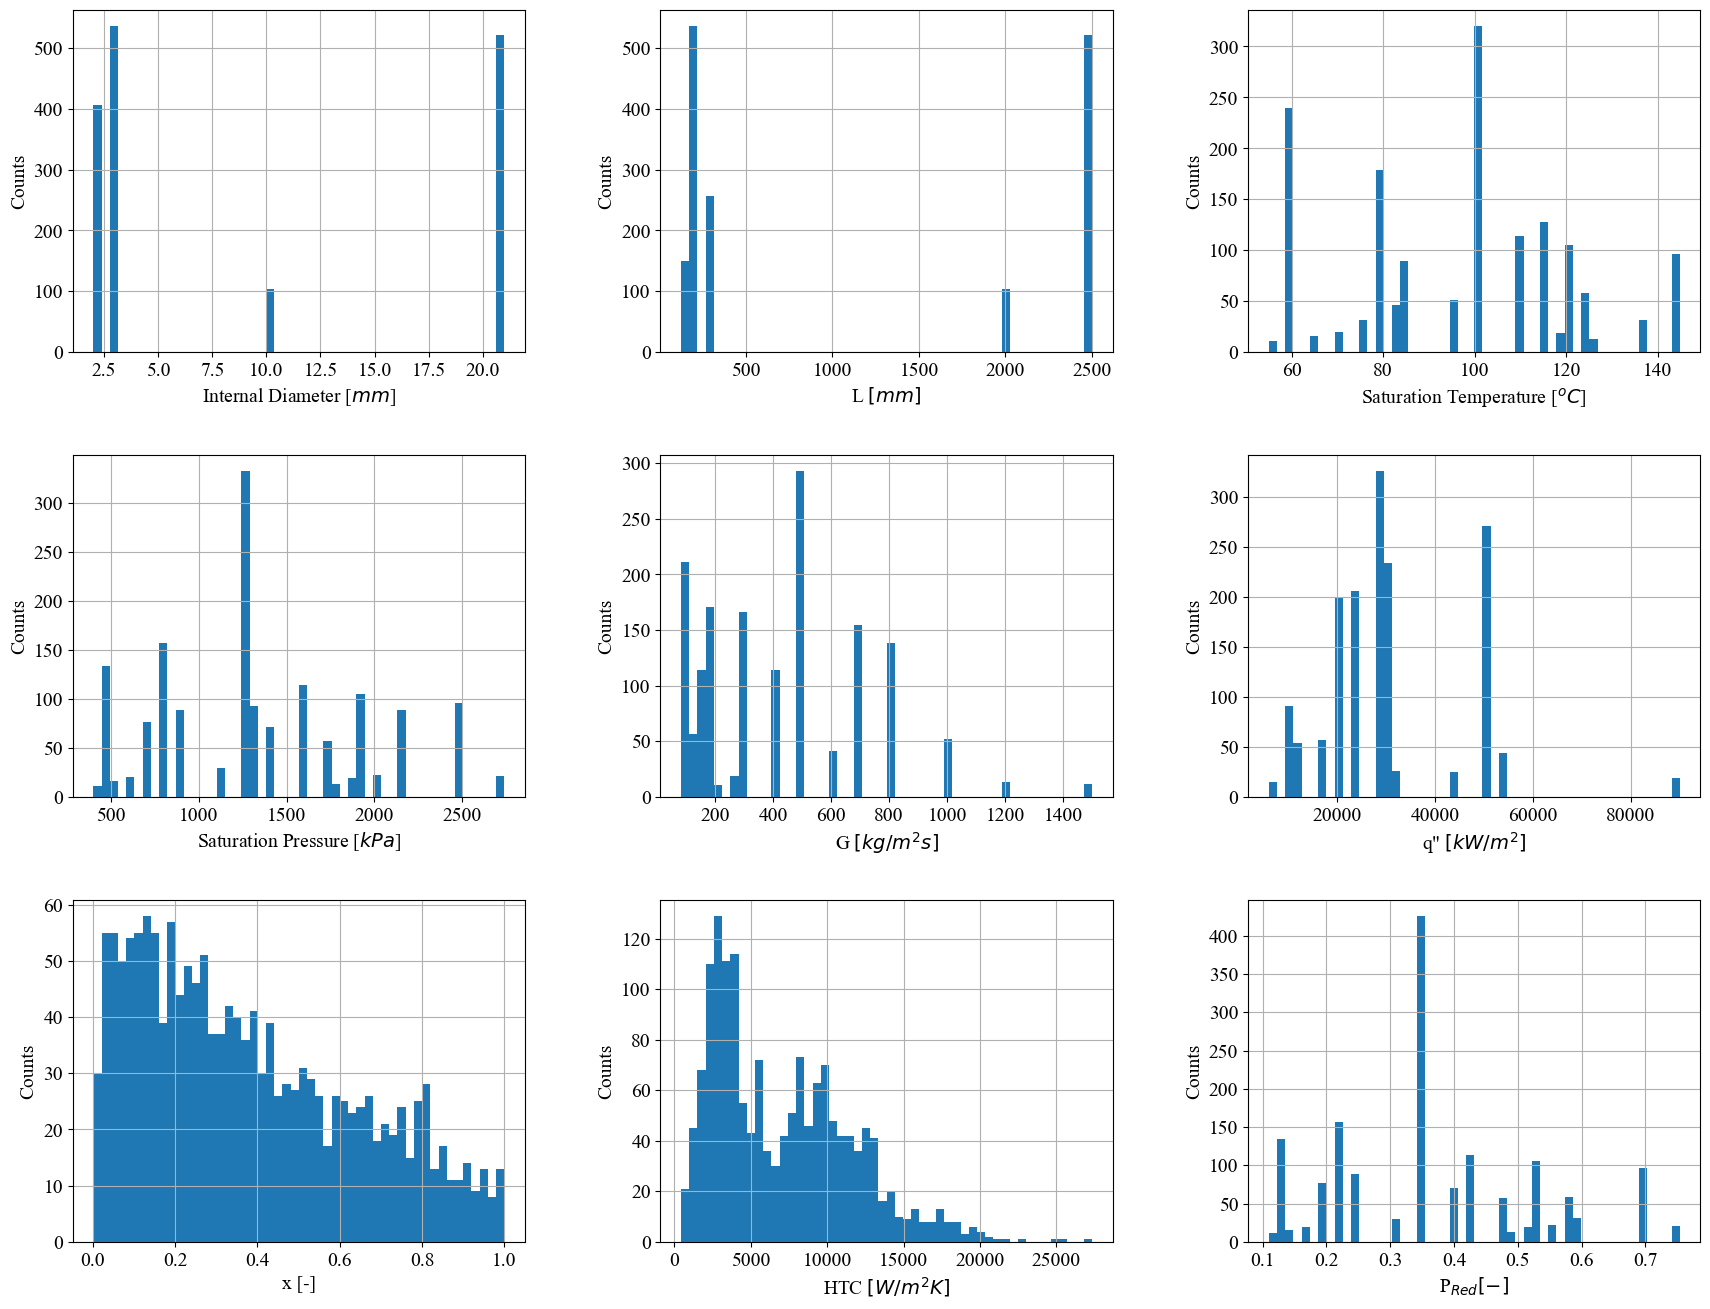

In [13]:
columns_to_plot=df[['Internal Diameter [${mm}$]','L $[mm]$','Saturation Temperature [${^{o}C}$]','Saturation Pressure [${kPa}$]',
'G $[{kg/m^{2}s}]$','q" $[{kW/m^{2}}]$', 'x [-]','HTC $[{W/m^{2}K}]$', 'P$_{Red} [-]$']]

axes=columns_to_plot.hist(bins=50, figsize=(21,16))
labels=['Internal Diameter [${mm}$]','L $[mm]$','Saturation Temperature [${^{o}C}$]','Saturation Pressure [${kPa}$]',
'G $[{kg/m^{2}s}]$','q" $[{kW/m^{2}}]$', 'x [-]','HTC $[{W/m^{2}K}]$', 'P$_{Red}  [-]$']

axes=axes.flatten()

for ax, label in zip(axes, labels):
    ax.set_xlabel(label)
    ax.set_ylabel('Counts')
    ax.set_title('')

plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()
# plt.savefig('AllDataCount_plot.png', dpi=100, bbox_inches='tight')


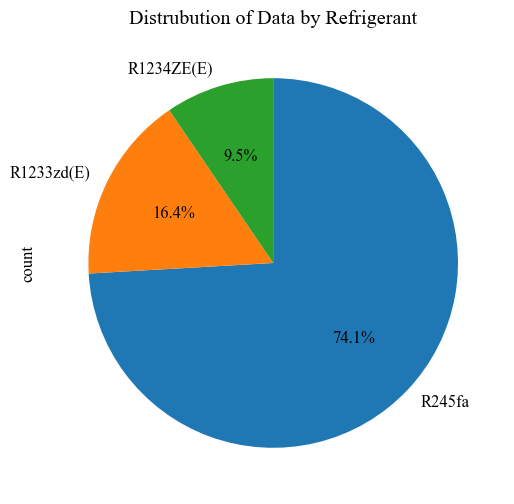

In [14]:
plt.figure(figsize=(6, 6))
df["Working Fluid"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)
# plt.set_ylabel("")

plt.title("Distrubution of Data by Refrigerant")
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

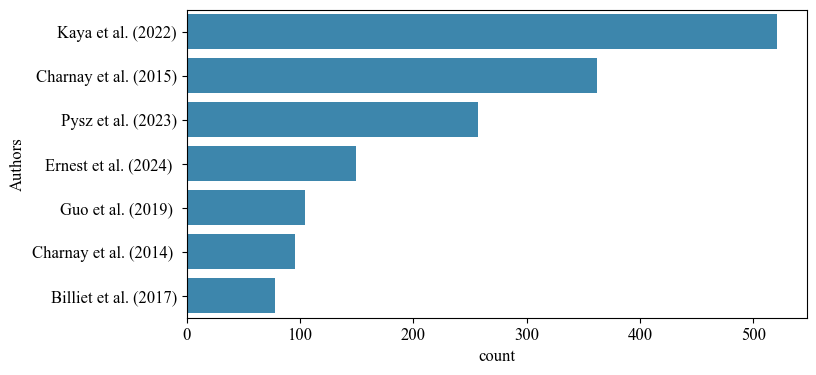

In [18]:
plt.figure(figsize=(8, 4))
Author=df['Authors'].value_counts()
order=df['Authors'].value_counts().index
sns.countplot(y='Authors', data=df,order=order, orient='h', color='#2b8cbe')
plt.xlabel='Counts'
plt.ylabel='Authors'

plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

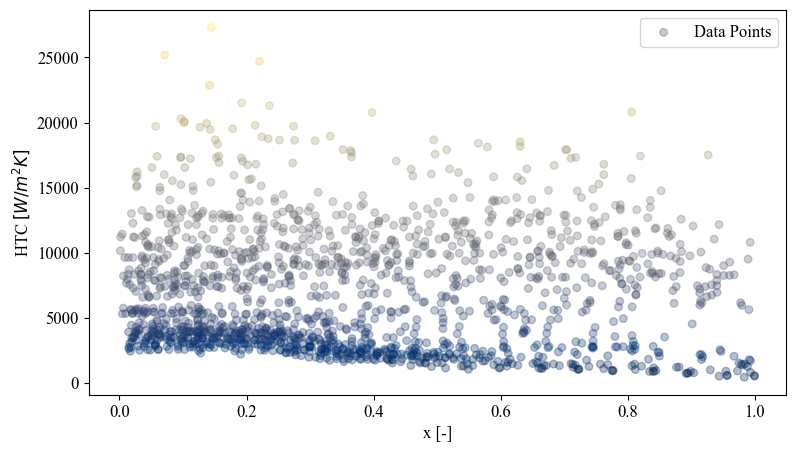

In [19]:
df.plot (kind="scatter", x="x [-]", y='HTC $[{W/m^{2}K}]$', alpha=0.3, label="Data Points", 
            figsize=(9,5), c="HTC $[{W/m^{2}K}]$",s=30,cmap=plt.get_cmap('cividis'), colorbar=False)
plt.legend()

In [20]:
df.columns

Index(['Authors', 'Working Fluid', 'Geometry ', 'Internal Diameter [${mm}$]',
       'Saturation Temperature [${^{o}C}$]', 'Saturation Pressure [${kPa}$]',
       'G $[{kg/m^{2}s}]$', 'q" $[{kW/m^{2}}]$', 'x [-]', 'HTC $[{W/m^{2}K}]$',
       'T$_{Red}[-]$', 'P$_{Red} [-]$', '﻿ρL (kg/m3)', '﻿ρV [kg/m3]',
       'uL (Pa-s)', 'uV (Pa-s)', '﻿λL (W/m-K)', '﻿λV (W/m-K)', '﻿σ(﻿Nm−1)',
       'hL (﻿[kJ/kg)', 'hV (﻿[kJ/kg)', 'hLV (﻿[kJ/kg)', '﻿cpL (﻿J/kgK)',
       '﻿cpV (﻿kJ/kgK)', '﻿Tcrit [ ◦C]', '﻿Pcrit [kPa]', 'L $[mm]$'],
      dtype='object')

/Users/bullet/Desktop/Machine_Learning projects_2024/ML_inbits/HTvenv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from font(s) Times New Roman.
  fig.canvas.draw()
/Users/bullet/Desktop/Machine_Learning projects_2024/ML_inbits/HTvenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from font(s) Times New Roman.
  func(*args, **kwargs)
/Users/bullet/Desktop/Machine_Learning projects_2024/ML_inbits/HTvenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from font(s) Times New Roman.
  fig.canvas.print_figure(bytes_io, **kw)


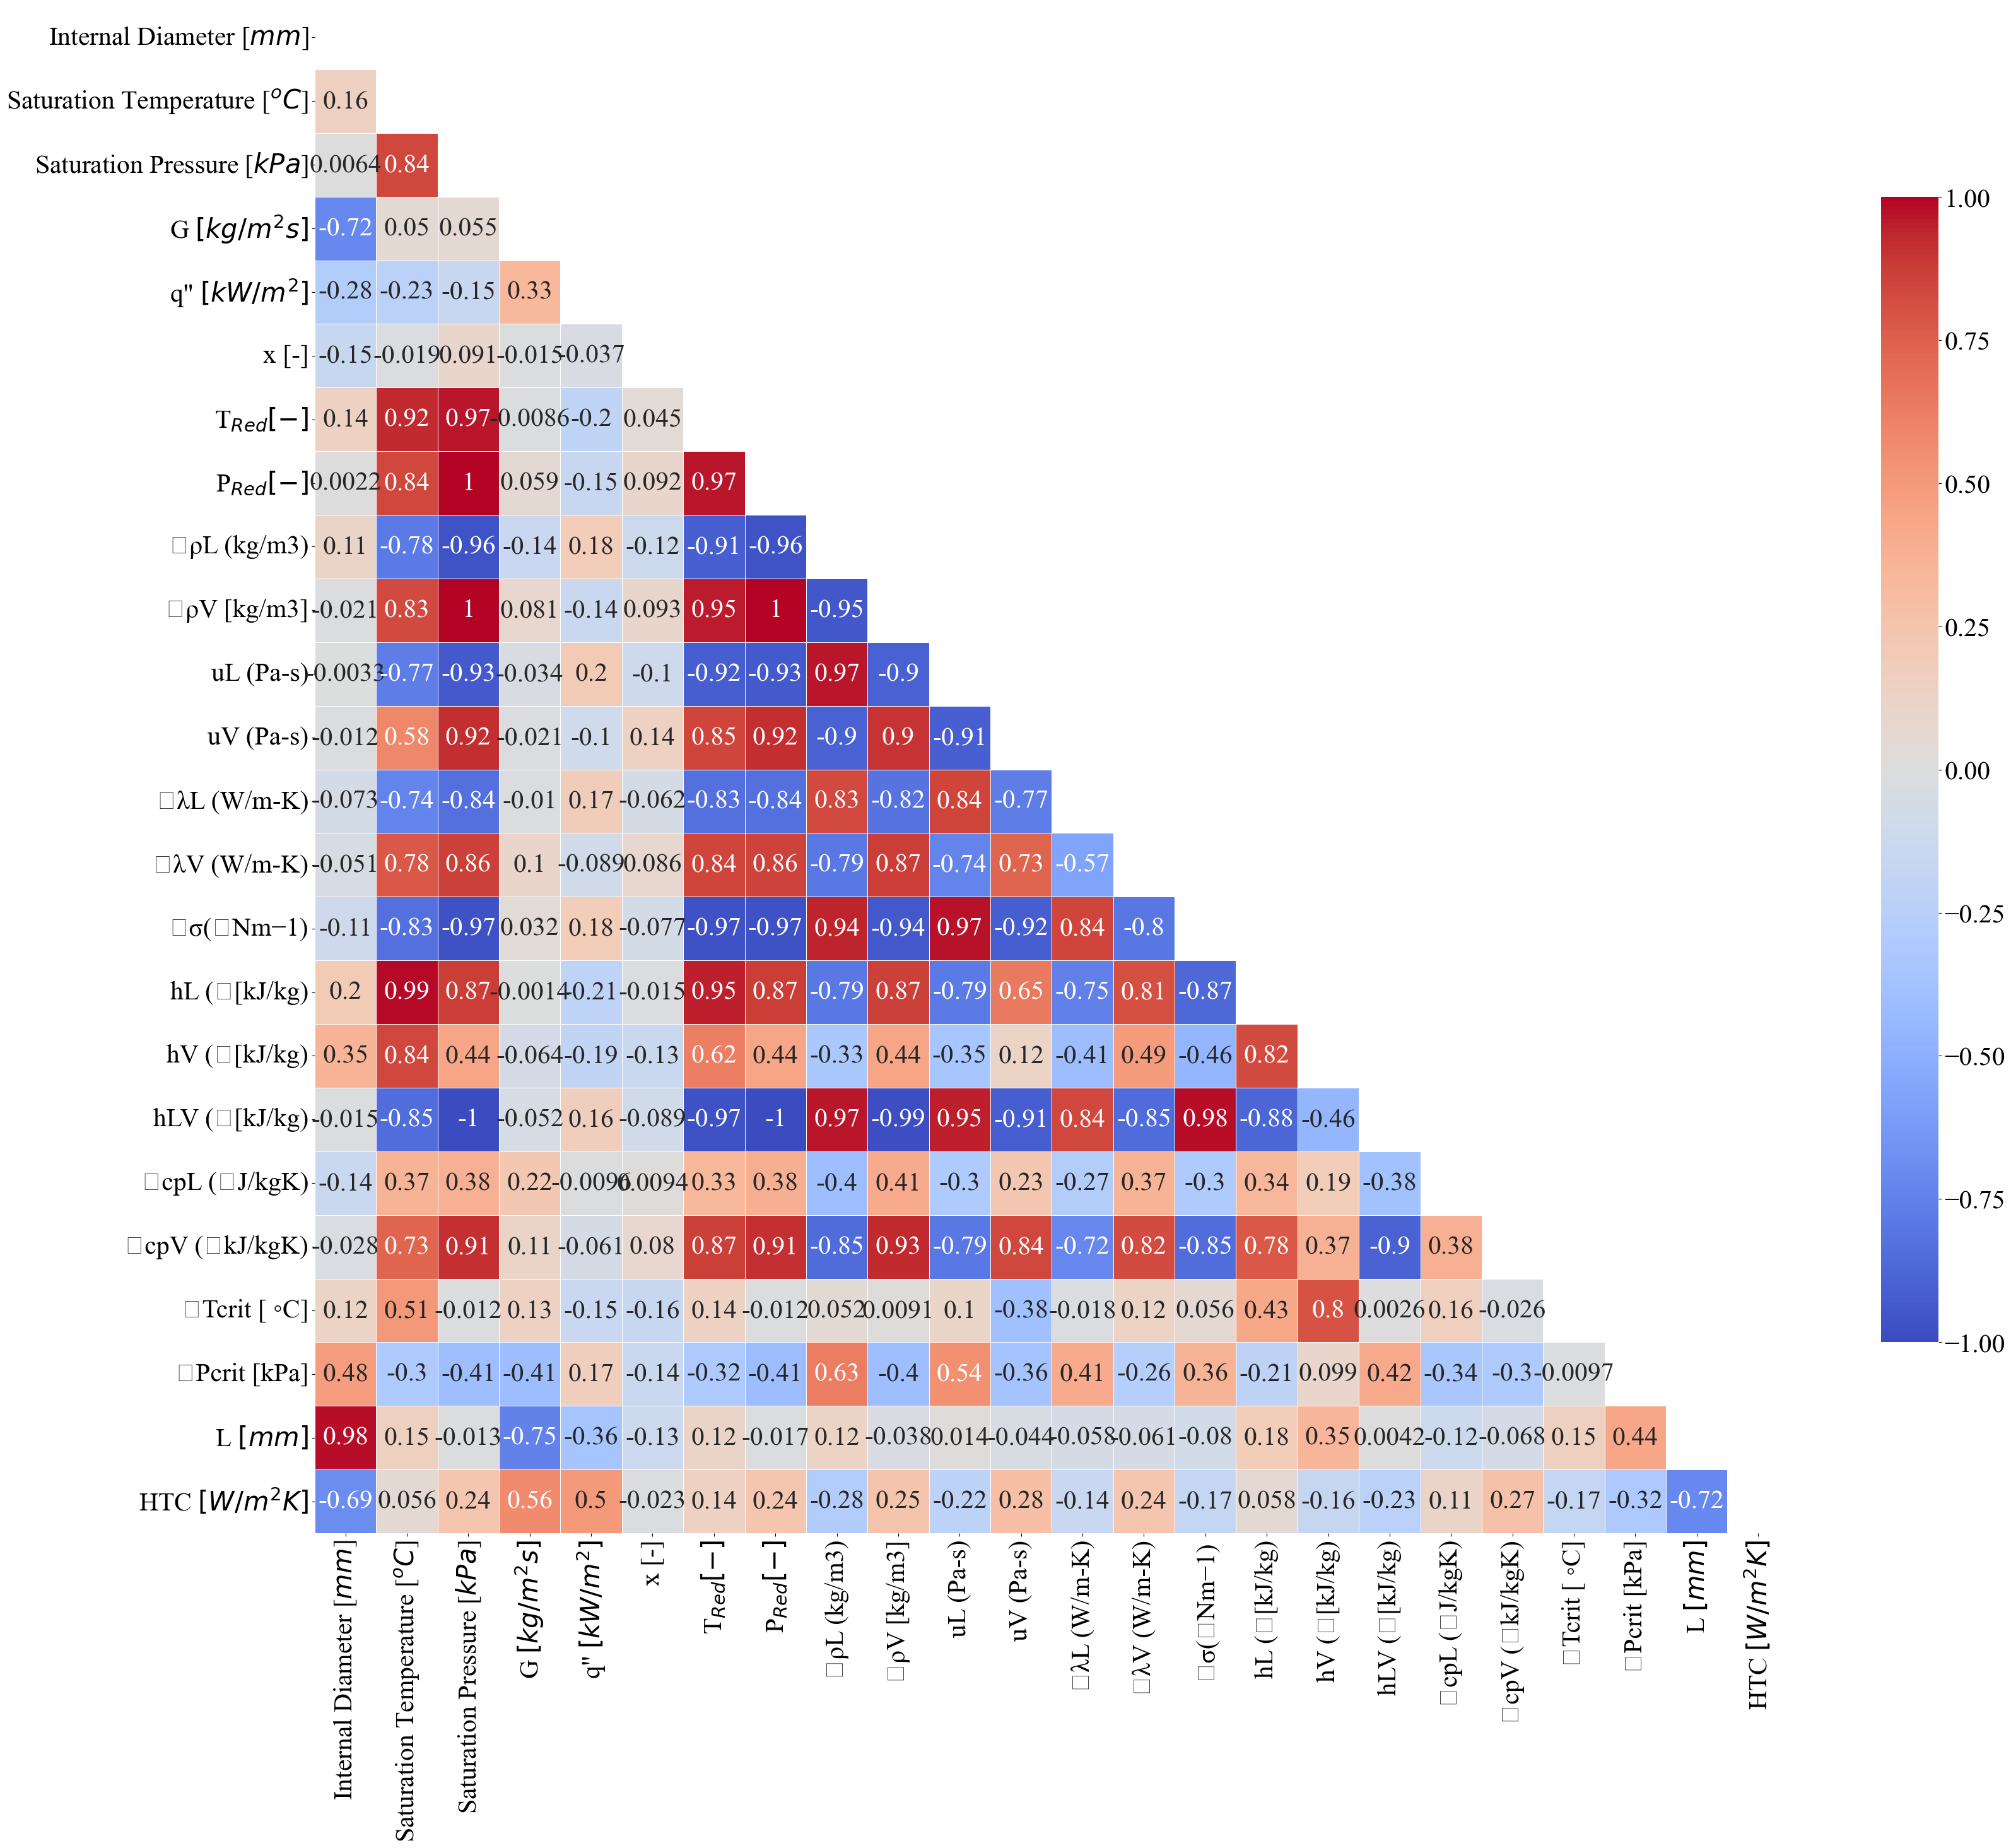

In [23]:
cont=[ 'Internal Diameter [${mm}$]', 'Saturation Temperature [${^{o}C}$]', 'Saturation Pressure [${kPa}$]',
       'G $[{kg/m^{2}s}]$', 'q" $[{kW/m^{2}}]$', 'x [-]',
       'T$_{Red}[-]$', 'P$_{Red} [-]$', '﻿ρL (kg/m3)', '﻿ρV [kg/m3]',
       'uL (Pa-s)', 'uV (Pa-s)', '﻿λL (W/m-K)', '﻿λV (W/m-K)', '﻿σ(﻿Nm−1)',
       'hL (﻿[kJ/kg)', 'hV (﻿[kJ/kg)', 'hLV (﻿[kJ/kg)', '﻿cpL (﻿J/kgK)',
       '﻿cpV (﻿kJ/kgK)', '﻿Tcrit [ ◦C]', '﻿Pcrit [kPa]', 'L $[mm]$','HTC $[{W/m^{2}K}]$']

# def Correlation_Matrix():
corr_Matrix=pd.DataFrame(df[cont], columns=cont).corr()

plt.rcParams['text.usetex']=False
plt.rcParams['font.size']=30
# plt.rcParams['font.family']='Times New Roman'
font = {'family': 'serif',
        'serif': ['Times New Roman'],
        'size': 30}
plt.rc('font', **font)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_Matrix, dtype=bool))

corr_matrix=pd.DataFrame(df[cont], columns=cont).corr()

plt.figure(figsize=(35, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmax=1, vmin=-1,mask=mask, linewidths=0.5, cbar_kws={"shrink": 0.75})
# plt.title('Correlation Matrix For Dimensional Features')
plt.tight_layout()


# Correlation_Matrix()


In [24]:
corr_Matrix['HTC $[{W/m^{2}K}]$'].sort_values(ascending=False)

HTC $[{W/m^{2}K}]$                    1.000000
G $[{kg/m^{2}s}]$                     0.564050
q" $[{kW/m^{2}}]$                     0.496138
uV (Pa-s)                             0.282469
﻿cpV (﻿kJ/kgK)                        0.266941
﻿ρV [kg/m3]                           0.253148
﻿λV (W/m-K)                           0.239990
P$_{Red} [-]$                         0.238357
Saturation Pressure [${kPa}$]         0.236834
T$_{Red}[-]$                          0.141731
﻿cpL (﻿J/kgK)                         0.113357
hL (﻿[kJ/kg)                          0.058216
Saturation Temperature [${^{o}C}$]    0.056082
x [-]                                -0.022592
﻿λL (W/m-K)                          -0.143937
hV (﻿[kJ/kg)                         -0.160926
﻿Tcrit [ ◦C]                         -0.168551
﻿σ(﻿Nm−1)                            -0.169263
uL (Pa-s)                            -0.221063
hLV (﻿[kJ/kg)                        -0.226869
﻿ρL (kg/m3)                          -0.284496
﻿Pcrit [kPa] 

/var/folders/sy/qkqwxxmn2cz5_wgpfjcjlbpm0000gn/T/ipykernel_16538/90173739.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette='coolwarm')
/var/folders/sy/qkqwxxmn2cz5_wgpfjcjlbpm0000gn/T/ipykernel_16538/90173739.py:15: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from font(s) Times New Roman.
  plt.tight_layout()
/Users/bullet/Desktop/Machine_Learning projects_2024/ML_inbits/HTvenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from font(s) Times New Roman.
  fig.canvas.print_figure(bytes_io, **kw)


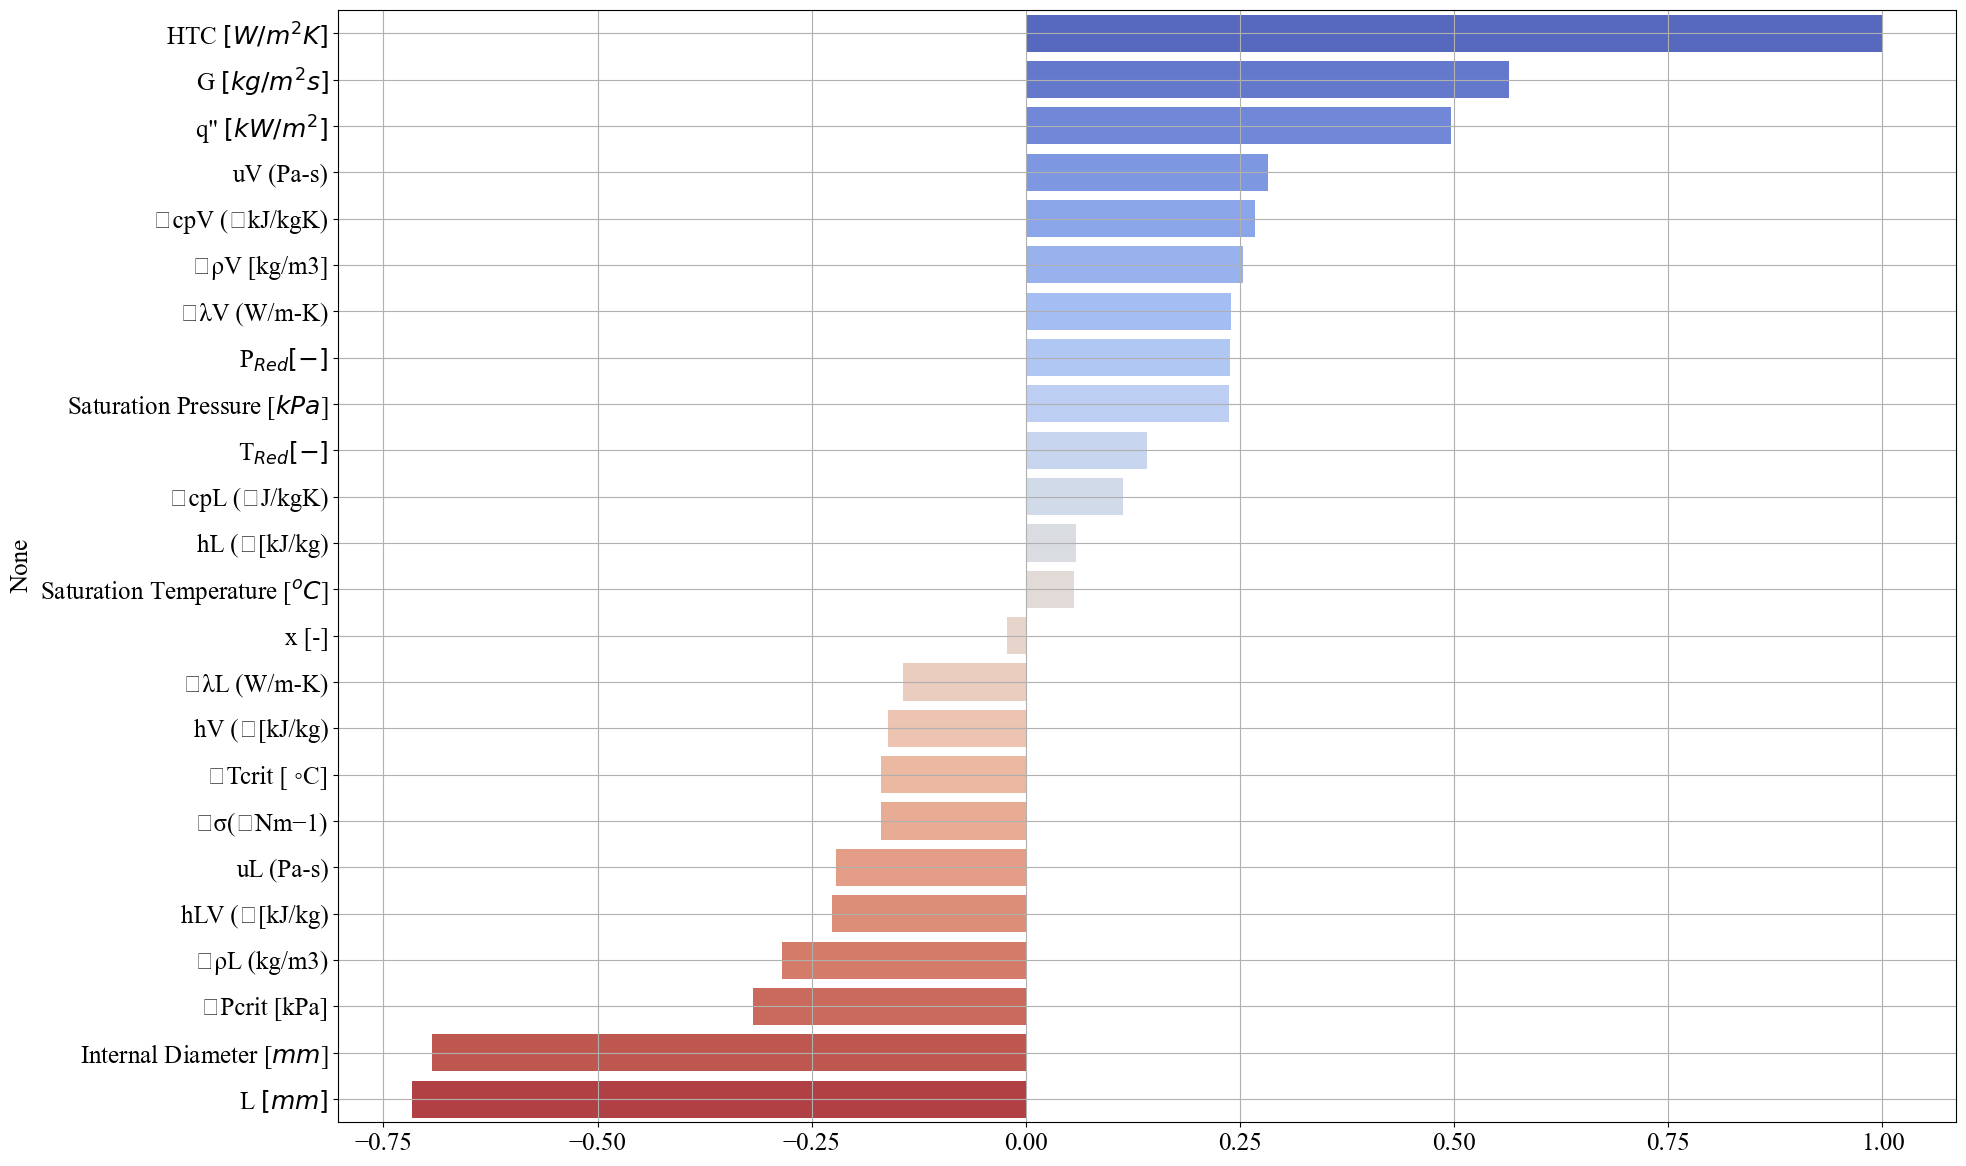

In [27]:
plt.rcParams['text.usetex']=False
plt.rcParams['font.size']=16
# plt.rcParams['font.family']='Times New Roman'
font = {'family': 'serif',
        'serif': ['Times New Roman'],
        'size': 18}
plt.rc('font', **font)

sorted_corr = corr_matrix['HTC $[{W/m^{2}K}]$'].sort_values(ascending=False)

plt.figure(figsize=(20, 12))

sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette='coolwarm')

plt.tight_layout()
plt.grid(True)

# plt.savefig('Sorted_Correlation_HTC.png', dpi=300)

plt.show()

### Splitting Data into Features and Labels

In [28]:
features=df.drop(['Authors','HTC $[{W/m^{2}K}]$'], axis=1)
target=df['HTC $[{W/m^{2}K}]$']

In [29]:
print (features.shape)
print (target.shape)

(1567, 25)
(1567,)


In [118]:
features



,Working Fluid,Geometry,Internal Diameter [${mm}$],Saturation Temperature [${^{o}C}$],Saturation Pressure [${kPa}$],G $[{kg/m^{2}s}]$,"q"" $[{kW/m^{2}}]$",x [-],T$_{Red}[-]$,P$_{Red} [-]$,...,﻿λV (W/m-K),﻿σ(﻿Nm−1),hL (﻿[kJ/kg),hV (﻿[kJ/kg),hLV (﻿[kJ/kg),﻿cpL (﻿J/kgK),﻿cpV (﻿kJ/kgK),﻿Tcrit [ ◦C],﻿Pcrit [kPa],L $[mm]$
3,2,0,3.00,60.0,462.46,300,50000,0.040712,0.389965,0.126667,...,0.015769,0.009242,279.99,449.11,169.12,1413.7,1029.0,153.86,3651.0,185
4,2,0,3.00,60.0,462.46,300,50000,0.063613,0.389965,0.126667,...,0.015769,0.009242,279.99,449.11,169.12,1413.7,1029.0,153.86,3651.0,185
5,2,0,3.00,60.0,462.46,300,50000,0.091603,0.389965,0.126667,...,0.015769,0.009242,279.99,449.11,169.12,1413.7,1029.0,153.86,3651.0,185
6,2,0,3.00,60.0,462.46,300,50000,0.117048,0.389965,0.126667,...,0.015769,0.009242,279.99,449.11,169.12,1413.7,1029.0,153.86,3651.0,185
7,2,0,3.00,60.0,462.46,300,50000,0.142494,0.389965,0.126667,...,0.015769,0.009242,279.99,449.11,169.12,1413.7,1029.0,153.86,3651.0,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,1,0,2.07,60.0,1276.60,400,50000,0.784997,0.548446,0.351206,...,0.017273,0.004470,284.78,420.26,135.48,1558.3,1203.6,109.40,3634.9,125
1574,1,0,2.07,60.0,1276.60,400,50000,0.784992,0.548446,0.351206,...,0.017273,0.004470,284.78,420.26,135.48,1558.3,1203.6,109.40,3634.9,125
1575,1,0,2.07,60.0,1276.60,400,50000,0.797842,0.548446,0.351206,...,0.017273,0.004470,284.78,420.26,135.48,1558.3,1203.6,109.40,3634.9,125
1576,1,0,2.07,60.0,1276.60,400,50000,0.797826,0.548446,0.351206,...,0.017273,0.004470,284.78,420.26,135.48,1558.3,1203.6,109.40,3634.9,125


In [30]:
# Label Encoding The Categorical Values
le_working_fluid = LabelEncoder()
le_tube_geometry = LabelEncoder()

features['Working Fluid'] = le_working_fluid.fit_transform(features['Working Fluid'])
features['Geometry '] = le_tube_geometry.fit_transform(features['Geometry '])

In [31]:
# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [32]:
# Splitting the data into Training and Testing Dataset
X_train, X_test, y_train, y_test=train_test_split(features_scaled, target, test_size=0.2, random_state=42)

### Random Forest Model 

In [139]:
# BaseModel

RF_model=RandomForestRegressor()
RF_model.fit(X_train, y_train)

y_RF_predicted = RF_model.predict(X_test)

mre_calc= (np.mean((y_test-y_RF_predicted)/y_test))*100
mae_ = (np.mean(np.abs((y_test - y_RF_predicted) / y_test)))*100
mse= np.mean(np.square(y_test-y_RF_predicted))
mse2=np.mean((y_test-y_RF_predicted)**2)
r2 = r2_score(y_test, y_RF_predicted)

    
print(f'MAE : {mae_}')
print(f'MRE: {mre_calc}')
print(f'R2: {r2}')
print (f'MSE: {mse2}')

print ('\n')
print(f'R2: {r2_score(list(y_test), list(y_RF_predicted))}')



MAE : 6.317543173260129
MRE: -2.1778460070666266
R2: 0.9703764589271832
MSE: 617616.4727803892


R2: 0.9703764589271832


#### Applying Bayesian Optimization on the Base Model 

In [99]:

search_spaces_RandomForest = {'n_estimators':(10, 1000), 
                    'max_depth': Integer(1, 50),
                    'min_samples_split':(2,20),
                    'min_samples_leaf':(1,20),
                    'max_features':['sqrt','log2'],
                    'bootstrap':[True,False]}

RF_Model= RandomForestRegressor()
RF_opt = BayesSearchCV(estimator=RF_Model,search_spaces=search_spaces_RandomForest, scoring='r2', cv=5, n_iter=50, n_jobs=-1, random_state=42)
RF_opt.fit(X_train, y_train)

RF_opt_y_prediction=RF_opt.best_estimator_.predict(X_test)
r2_score(list(y_test),list(RF_opt_y_prediction))

best_model=RF_opt.best_estimator_
best_params=RF_opt.best_params_
best_score=RF_opt.best_score_

mre_calc= (np.mean((y_test-RF_opt_y_prediction)/y_test))*100
mae_ = (np.mean(np.abs((y_test - RF_opt_y_prediction) / y_test)))*100

print("Best model", best_model)
print ('\n')
print("Best Model Parameters", best_params)
print('\n')
print("Best model Scores", best_score)

print("MRE", mre_calc)
print('\n')
print ("MAE", mae_)


47233.75s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
47233.75s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
47233.75s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
47233.80s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.02s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01

Best model RandomForestRegressor(bootstrap=False, max_depth=44, max_features='sqrt',
                      n_estimators=1000)


Best Model Parameters OrderedDict({'bootstrap': False, 'max_depth': 44, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000})


Best model Scores 0.9642981283976028
MRE -2.589739243559425


MAE 6.350975753783865


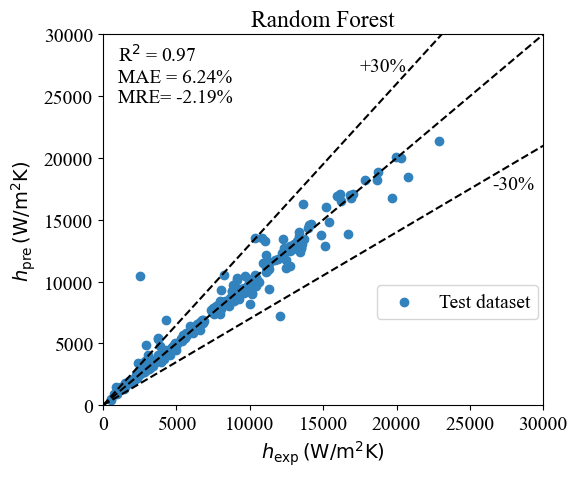

In [102]:
plt.rcParams['text.usetex']=False
plt.rcParams['font.size']=14
# plt.rcParams['font.family']='Times New Roman'
font = {'family': 'serif',
        'serif': ['Times New Roman'],
        'size': 14}
plt.rc('font', **font)


plt.figure(figsize=(6,5))
plt.scatter(y_test,RF_opt_y_prediction, color='#3182bd',label='Test dataset')

plt.plot([0, 30000], [0, 30000], color='black',linestyle='--')
plt.plot([0, 30000], [0*0.7, 30000*0.7], color='black',linestyle='--')
plt.plot([0, 30000], [0*1.3, 30000*1.3], color='black',linestyle='--' )

plt.xlim([0, 30000])
plt.ylim([0, 30000])

plt.title('Random Forest')
plt.text(17500,27000, '+30%')
plt.text(26500,17500, '-30%')
plt.text(1000,24500, 'R$^{2}$ = 0.97\nMAE = 6.24% \nMRE= -2.19%', color='black',bbox=dict(facecolor='#ffffff', edgecolor='white'))

# ['R2': '0.97', 'MAE':'6.24', 'MRE': '-2.19'

plt.xlabel(r'$h_{\mathrm{exp}} \, (\mathrm{W/m^2K})$', fontsize=14, fontname='Times New Roman')
plt.ylabel(r'$h_{\mathrm{pre}} \, (\mathrm{W/m^2K})$', fontsize=14, fontname='Times New Roman')

plt.legend(bbox_to_anchor=(0.6,0.35))
plt.tight_layout()
# plt.grid(True, which='both', linestyle='--',linewidth=0.5)
# plt.savefig('Optimized_RandomForest.png',dpi=300)

plt.show()


#### Random Forest feature Importance Selection 

/var/folders/sy/qkqwxxmn2cz5_wgpfjcjlbpm0000gn/T/ipykernel_13324/4277225442.py:35: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from font(s) Times New Roman.
  plt.tight_layout()
/Users/bullet/Desktop/Machine_Learning projects_2024/ML_inbits/HTvenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from font(s) Times New Roman.
  fig.canvas.print_figure(bytes_io, **kw)


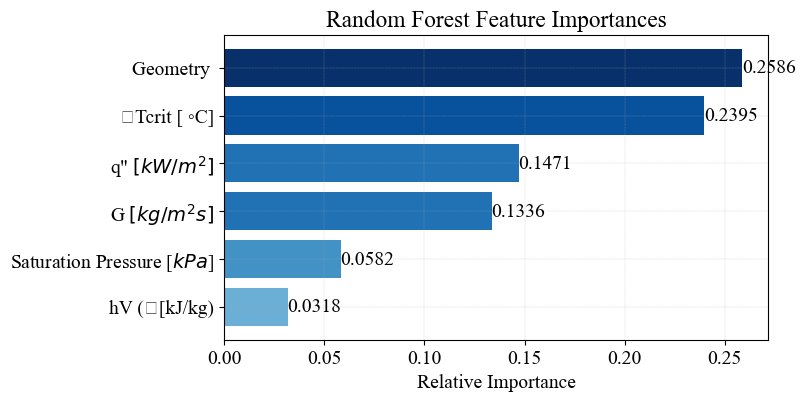

In [110]:
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = 12

font = {'family': 'serif',
        'serif': ['Times New Roman'],
        'size': 14}
plt.rc('font', **font)

RF_Model_Default = RandomForestRegressor(random_state=42)
RF_Model_Default.fit(X_test, y_test)

# Feature importances
importance = RF_Model_Default.feature_importances_

# Top 6 important features
indices = np.argsort(importance)[-6:]

colors = ['#6baed6', '#4292c6', '#2171b5', '#2171b5', '#08519c', '#08306b']

# bar plot
plt.figure(figsize=(8, 4))
plt.title('Random Forest Feature Importances')
bars = plt.barh(range(6), importance[indices], color=colors, align='center')
plt.yticks(range(6), df.columns[indices])
plt.grid(linestyle='--', linewidth=0.2, alpha=0.9)
plt.tight_layout()
plt.xlabel('Relative Importance')

# Add text annotations for each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center')

# Save and show the plot
# plt.savefig("RandomForest_FeatureImportance1.png", dpi=300)
plt.show()


#### Optimized Model Feature Importance 

/var/folders/sy/qkqwxxmn2cz5_wgpfjcjlbpm0000gn/T/ipykernel_13324/225520531.py:16: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from font(s) Times New Roman.
  plt.tight_layout()
/Users/bullet/Desktop/Machine_Learning projects_2024/ML_inbits/HTvenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from font(s) Times New Roman.
  fig.canvas.print_figure(bytes_io, **kw)


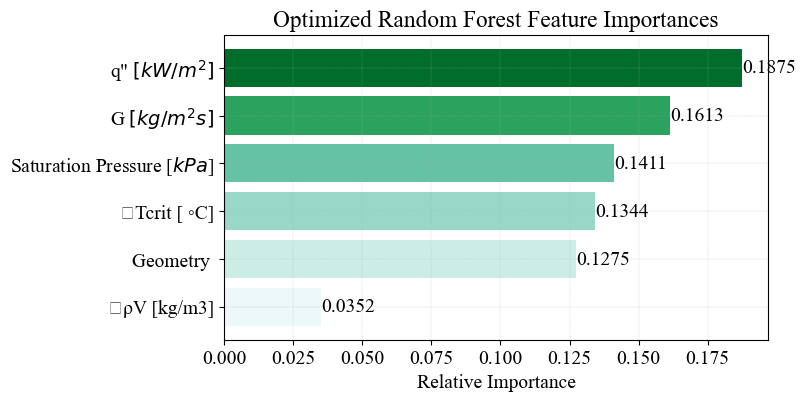

In [117]:

best_rf_model = RF_opt.best_estimator_

importance = best_rf_model.feature_importances_

indices = np.argsort(importance)[-6:]  

# colors = ['#6baed6', '#4292c6', '#2171b5', '#2171b5', '#08519c', '#08306b']
colors =['#edf8fb','#ccece6','#99d8c9','#66c2a4','#2ca25f','#006d2c']

# bar plot
plt.figure(figsize=(8, 4))
plt.title('Optimized Random Forest Feature Importances')
bars = plt.barh(range(len(indices)), importance[indices], color=colors, align='center')
plt.yticks(range(len(indices)), df.columns[indices])
plt.grid(linestyle='--', linewidth=0.2, alpha=0.9)
plt.tight_layout()
plt.xlabel('Relative Importance')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center')
plt.show()


#### Testing and Saving Model


#### 1. Testing Model

In [135]:
X_new= np.array([['R1233zd(E)','H',2.07, 74.7,576.62,373.00,18400,0.03,0.45,0.16, \
    1130.80,30.46,0.00017724,0.000012075,0.07,0.02,0.01,292.82,454.42,161.60,1320.70,980.97,166.5,3623.7,125 ]])

X_new

array([['R1233zd(E)', 'H', '2.07', '74.7', '576.62', '373.0', '18400',
        '0.03', '0.45', '0.16', '1130.8', '30.46', '0.00017724',
        '1.2075e-05', '0.07', '0.02', '0.01', '292.82', '454.42',
        '161.6', '1320.7', '980.97', '166.5', '3623.7', '125']],
      dtype='<U32')

In [146]:
X_new= np.array([['R1233zd(E)','H',2.07, 74.7,576.62,373.00,18400,0.03,0.45,0.16, \
    1130.80,30.46,0.00017724,0.000012075,0.07,0.02,0.01,292.82,454.42,161.60,1320.70,980.97,166.5,3623.7,125 ], \
                 ['R1233zd(E)','H',2.07, 74.7,576.62,373.00,18400,0.81,0.45,0.16, \
    1130.80,30.46,0.00017724,0.000012075,0.07,0.02,0.01,292.82,454.42,161.60,1320.70,980.97,166.5,3623.7,125 ],
                 ['R245fa','H',207, 95.10, 1132.40, 280, 54300, 0.11,0.62,0.31,1113.80,64.06,0.00016576,\
    0.000013109, 0.07, 0.02, 0.01, 331.92,472.35, 140.43, 1563.80, 1231.6, 153.86, 3651, 125] ])

try:
    X_new[:, 0] = le_working_fluid.transform(X_new[:, 0]) 
except KeyError as e:
    print(f"Error: {e}. This working fluid was not seen in the training data.")

try:
    X_new[:, 1] = le_tube_geometry.transform(X_new[:, 1]) 
except KeyError as e:
    print(f"Error: {e}. This tube geometry was not seen in the training data.")

X_new = X_new.astype(float)

X_new_scaled = scaler.transform(X_new)


/Users/bullet/Desktop/Machine_Learning projects_2024/ML_inbits/HTvenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [148]:
# Predict using your model (pipeline or directly)
y_pred = RF_model.predict(X_new_scaled)

print(f"Predicted y_value: {y_pred}")


Predicted y_value: [7838.37934736 8284.51997138 8266.41182663]


#### 2. Saving and Loading Model

In [149]:
import pickle


In [162]:
data={'model':RF_model, 
      'le_working_fluid':le_working_fluid, 
      'le_tube_geometry': le_tube_geometry, 
      'scaler':scaler }

with open ("RF_model.pkl", 'wb') as file:
    pickle.dump(data, file)
    

print(f"Model loaded: {RF_model}")


Model loaded: RandomForestRegressor()


In [160]:
with open('RF_model.pkl','rb') as file:
    data=pickle.load(file)
    

RF_model= data['model']
le_tube_geometry= data['le_tube_geometry'] 
le_working_fluid= data['le_working_fluid']
scaler=data['scaler']

print("Model and preprocessing objects loaded successfully")


Model and preprocessing objects loaded successfully


In [164]:

# Predict with the loaded model
y_pred = RF_model.predict(X_new_scaled)

print(f"Predicted values: {y_pred}")


Predicted values: [7838.37934736 7838.37934736]


In [170]:
df["Working Fluid"].unique()

array(['R245fa', 'R1233zd(E)', 'R1234ZE(E)'], dtype=object)